<a href="https://colab.research.google.com/github/wordsbyanmol/Machine-Learning-Course/blob/main/Copy_of_Anmol_mlpp24_assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **MLPP24 // Assignment #3 (GGD: Total = 45 / 50)**

assigned : **Feb 26, 2024**

DUE : **Mar 4, 2024 11:59pm**

## Zip Codes Business Patterns: economic trends across geographies

<img src="https://larrylittlefield.files.wordpress.com/2017/08/retsmall2015new.png" width=300>

---

<b>

How to complete and submit assignments:

1. Please make a copy of this notebook in your Google Drive and add your name to the filename.

2. Once you have completed the notebook, please share it with me before the due date and time by clicking the "Share" button in the upper right corner of the notebook.


Rules for assignments:

1. You may work with other students in the class, but if you do, each student with whom you worked <u>must</u> be listed below.  Direct copying from someone else's notebook is not permitted.

2. You may use generative AI models (e.g., ChatGPT) to help complete the assignment but if you do you must answer YES to the question below and bear in mind that such models <u>often</u> yield incorrect and biased solutions.

3. All solutions and outputs must be derived with python and the notebook should be "runable" by me (top to bottom) without errors.

4. Late assignments will assess a 15% late penalty up to 3 days after the due date and a 50% late penalty until the end of the term.

</b>

<u>**Instructions for tasks that will be graded are in bold below.**</u>

---

**Please list the names of the other students with whom you worked for this assignment (if none, put "None").**

# Nesar and Maria

**Did you use a generative AI model (e.g., ChatGPT) to create text or code for this assignment?**

Yes

---

*Your goal for this assignment will be to identify spatio-temporal trends in the number of businesses per zip code in NYC over the time period of 2000-2012 using [zipcode business patterns (ZBP)](https://www.census.gov/data/developers/data-sets/cbp-nonemp-zbp/zbp-api.html) data.*

<br>


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **PART 1 - Loading and visualizing the data**

<b> Load the pre-cleaned NYC zipcode business patterns data (in the `mlpp24/data/zbp/` folder) into a pandas DataFrame. </b>

In [ ]:
#import libraries for analysis
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import geopandas as gpd


In [ ]:
#setting plot defaults
plt.style.use("bmh")
px.defaults.width= 800
px.defaults.template= "ggplot2"


In [ ]:
#Load file
fname= "/content/drive/Shareddrives/mlpp24/data/zbp/nyc_zbp_est_total_2000_2012_clean.csv"

In [ ]:
#name dataframe
nyc=pd.read_csv(fname)
nyca= nyc
nyc.set_index("zip", inplace=True)
nyc.columns=['2000', '2001', '2002','2003', '2004', '2005', '2006', '2007','2008', '2009', '2010', '2011', '2012', 'longitude', 'latitude']
nyc = nyc.drop('longitude', axis=1)
nyc = nyc.drop('latitude', axis=1)
nyc

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
zip,,,,,,,,,,,,,
10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235
10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954
10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214
10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442
10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11693,79,89,94,98,96,97,104,110,125,131,132,131,129
11693,79,89,94,98,96,97,104,110,125,131,132,131,129
11693,79,89,94,98,96,97,104,110,125,131,132,131,129


In [ ]:
#show datframe
nyc.columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012'],
      dtype='object')

In [ ]:
#convert columns to integerts
#nyc.columns = nyc.columns.astype(int)

In [ ]:
nyc.columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012'],
      dtype='object')

In [ ]:
#check for NAANS
nyc.isna().sum ()

2000    0
2001    0
2002    0
2003    0
2004    0
2005    0
2006    0
2007    0
2008    0
2009    0
2010    0
2011    0
2012    0
dtype: int64

Note that this DataFrame has the zipcode, number of establishments in a given year from 2000 to 2012, and the latitude/longitude of the zip codes.


<b>Make a heat map of the raw NYC timeseries data using `plotly's` `imshow()` function making sure to set the limits of the colorbar to be 0 to 3000$^{\dagger}$, using `"viridis"` as the color map, and making sure to label the colorbar and your axes appropriately.</b>

<small>$^{\dagger}$ this means that the values $\leq0$ will have the lowest color value in your heat map and values $\geq3000$ will have the maximum color value in your heat map.

In [ ]:
# Create heatmap
heatmap_fig = px.imshow(nyc,
                        color_continuous_scale='viridis',
                        zmin=0,
                        zmax=3000,
                        labels={'x': 'Zip', 'y': 'Year', 'color': 'Number of Businesses'},
                        title='NYC Timeseries Heatmap of Business')

# Set colorbar title
heatmap_fig.update_layout(coloraxis_colorbar=dict(title='Number of Businesses'))

# Set axis titles
heatmap_fig.update_xaxes(title_text='Year')
heatmap_fig.update_yaxes(title_text='Zip')

# Show the plot
heatmap_fig.show()

<b> Is this heat map informative?  Why or why not?  What information can you glean from it? </b>

This map does offer some information but is limited in scope. It shows that zip codes starting from 10.01k have had the largest number of businesses and these numbers of businesses have been consistently high over the years 2000-2012. The 10.2k codes have businesses in the 0-500 range.  We also see the codes in the 11.2k and 11.4k range have range starting from 2000+ businesses and increasing over the years. The 10.8k to 11k range is constant across the years in the 500-1000 category.

The map needs restructuring to glean information. The comparison of changes in business is hard across years. It's also not easy to figure out the change in business across each zip code over the time period.

```
# This is formatted as code
```

TEXT FOR ANSWER HERE

In [ ]:
nyc. head ()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
zip,,,,,,,,,,,,,
10001,7317,7188,7141,7084,7370,7312,7415,7549,7472,7305,7241,7227,7235
10002,2277,2543,2269,2402,2551,2682,2686,2685,2691,2775,2872,2912,2954
10003,3683,3602,3616,3704,3776,3867,3909,4049,4071,4099,4113,4159,4214
10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442
10004,1294,1247,1253,1252,1283,1260,1311,1370,1376,1379,1398,1404,1442


<b> Standardize the NYC values across features (time steps).  Generate a new heatmap like above but with color limits -2 to 2. </b>

In [ ]:
nyc_st1 = nyc.sub(nyc.mean(axis=1),axis=0).divide(nyc.std(axis=1),axis=0)
nyc_st1

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012
zip,,,,,,,,,,,,,
10001,0.155006,-0.825917,-1.183307,-1.616738,0.558020,0.116985,0.900202,1.919145,1.333633,0.063757,-0.422902,-0.529359,-0.468526
10002,-1.620916,-0.427828,-1.656798,-1.060254,-0.391946,0.195628,0.213569,0.209084,0.235995,0.612760,1.047833,1.227245,1.415628
10003,-1.051384,-1.422523,-1.358376,-0.955163,-0.625262,-0.208303,-0.015861,0.625614,0.726417,0.854712,0.918860,1.129630,1.381638
10004,-0.501573,-1.187168,-1.099646,-1.114233,-0.662032,-0.997536,-0.253592,0.607049,0.694572,0.738333,1.015489,1.103012,1.657323
10004,-0.501573,-1.187168,-1.099646,-1.114233,-0.662032,-0.997536,-0.253592,0.607049,0.694572,0.738333,1.015489,1.103012,1.657323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11693,-1.607311,-1.068779,-0.799513,-0.584100,-0.691807,-0.637953,-0.260981,0.062138,0.869936,1.193056,1.246909,1.193056,1.085349
11693,-1.607311,-1.068779,-0.799513,-0.584100,-0.691807,-0.637953,-0.260981,0.062138,0.869936,1.193056,1.246909,1.193056,1.085349
11693,-1.607311,-1.068779,-0.799513,-0.584100,-0.691807,-0.637953,-0.260981,0.062138,0.869936,1.193056,1.246909,1.193056,1.085349


In [ ]:
nyc_st1.columns

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012'],
      dtype='object')

<b> Is this NEW heat map informative?  Why or why not?  What information can you glean from it?  Is there a trend across zipcodes that can be discerned here?  Are there multiple trends? (GGD: -2 [note that the units of the color bar are now standardized])</b>

In [ ]:
#create heatmap
heatmap_fig1= px.imshow(nyc_st1, color_continuous_scale='viridis',labels={'x': 'Year', 'y': 'Zip', 'color': 'NYC Number of Businesses'},
                       title='NYC Timeseries Heatmap of Business',)

In [ ]:
#display heatmap
heatmap_fig1

The new heatmap does a better job of showing us the change and variability in growth/decline of businesses over the years than the earlier map. There is a lot more variability across the years adn zip cides that comes through in this map. For instance, we see growth in business in the 11.6k+ zipcodes over the years. it starts from a low range and moves into a high category.  We also see decline in businesses on the 11.4k-11.6k codes post 2004. The 10.1k code which was showing consistent and high growth throughout the period in the earlier map shows volatility anbd declining trend over the years in this map. Thus, we see multiple trends playing out here.

### **PART 2 - Clustering NYC data**

<b> Using scikit-learn's `KMeans` model, cluster the standardized NYC data into 4 clusters setting `random_state` equal to 2. </b>

In [ ]:
km= KMeans(n_clusters=4, random_state=2, verbose=1)

<b> Make a four panel plot, one for each cluster center, showing the cluster center and its members.   Put the number of zipcodes belonging to that cluster as the title of each panel. Make sure to use proper values for the x-axis and axis labels for the axes.  To make this plot you may use either `matplotlib` <small>(see [this stackoverflow question](https://stackoverflow.com/questions/31726643/how-do-i-get-multiple-subplots-in-matplotlib) for an example if you do)</small> or `plotly` <small>(this [stackoverflow question](https://stackoverflow.com/questions/65696083/is-there-a-way-to-use-plotly-express-to-show-multiple-subplots) might be helpful)</small>. (GGD: -2 [I see that the answer for this one is in the next question; that's fine, but was looking for one 4 panel plot rather than four 1 panel plots])</b>

In [ ]:
#cluster the data
km.fit(nyc_st1)

Initialization complete
Iteration 0, inertia 1188.5182696120214.
Iteration 1, inertia 834.4488378909364.
Iteration 2, inertia 813.5960824413105.
Iteration 3, inertia 802.9245318449285.
Iteration 4, inertia 793.8443821120683.
Iteration 5, inertia 786.5878431509351.
Iteration 6, inertia 779.6208763317876.
Iteration 7, inertia 777.3213650877759.
Iteration 8, inertia 776.2574970436885.
Iteration 9, inertia 775.8900126330992.
Iteration 10, inertia 775.4499550395931.
Iteration 11, inertia 774.8249339368324.
Iteration 12, inertia 774.7058584617415.
Iteration 13, inertia 773.7990155474236.
Iteration 14, inertia 773.1543845742459.
Iteration 15, inertia 772.7772511251785.
Iteration 16, inertia 772.597229052116.
Iteration 17, inertia 772.5597365009398.
Iteration 18, inertia 772.5043096791345.
Iteration 19, inertia 772.4710114863342.
Converged at iteration 19: strict convergence.
Initialization complete
Iteration 0, inertia 1043.5239447258164.
Iteration 1, inertia 792.2473898483049.
Iteration 2, i

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=2, verbose=1)

In [ ]:
#display the clusters centers
km.cluster_centers_

array([[-1.52771177, -1.57804239, -0.43883931,  0.02742194,  0.66391678,
         0.77291603,  0.49129711,  0.62945743,  0.38786011,  0.1486693 ,
         0.19557251,  0.09242015,  0.13506211],
       [ 1.87876119,  1.200715  , -0.23438844, -0.66826194, -0.6008716 ,
        -0.61486671, -0.52104607, -0.14229081, -0.1924106 , -0.14165514,
        -0.00552535, -0.03096953,  0.07280999],
       [-1.4022036 , -1.27109726, -0.83869888, -0.64527308, -0.35491696,
        -0.14079563, -0.03515945,  0.20435782,  0.36646296,  0.53843727,
         0.88928422,  1.16292058,  1.52668201],
       [ 0.80685617,  0.83282663,  0.52170251,  0.56873411,  0.83930278,
         0.4953694 ,  0.39888011, -0.222717  , -0.45162725, -0.6041025 ,
        -0.93922427, -1.16559178, -1.0804089 ]])

In [ ]:
# -- make a scatter plot of the data
fig = px.scatter(nyc_st1, color_discrete_sequence=["steelblue"], opacity=0.4)
fig


<b> Make a choropleth of the cluster labels with the following steps:

1. Add the cluster labels back to your zipcode business pattern DataFrame, converting them to strings using `.astype(str)` as you do.
2. Load the NYC zipcode shapes from the `mlpp24/data/zipcode_shapes/nyc/` folder using `geopandas`.
3. Merge the zipcode business patterns DataFrame into the zipcode shapes GeoDataFrame.
4. Make a choropleth of the cluster labels.

Besure to include a legend for your choropleth.

(GGD: OK, your choropleth below looks fine, but note that you want to convert your cluster numbers to strings when adding them back to the DataFrame so they become categories rather than integer values)

</b>

In [ ]:
# Fit KMeans model to your data
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(nyc_st1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=4, random_state=2)

In [ ]:
#display the clusters centers
km.cluster_centers_

array([[-1.52771177, -1.57804239, -0.43883931,  0.02742194,  0.66391678,
         0.77291603,  0.49129711,  0.62945743,  0.38786011,  0.1486693 ,
         0.19557251,  0.09242015,  0.13506211],
       [ 1.87876119,  1.200715  , -0.23438844, -0.66826194, -0.6008716 ,
        -0.61486671, -0.52104607, -0.14229081, -0.1924106 , -0.14165514,
        -0.00552535, -0.03096953,  0.07280999],
       [-1.4022036 , -1.27109726, -0.83869888, -0.64527308, -0.35491696,
        -0.14079563, -0.03515945,  0.20435782,  0.36646296,  0.53843727,
         0.88928422,  1.16292058,  1.52668201],
       [ 0.80685617,  0.83282663,  0.52170251,  0.56873411,  0.83930278,
         0.4953694 ,  0.39888011, -0.222717  , -0.45162725, -0.6041025 ,
        -0.93922427, -1.16559178, -1.0804089 ]])

In [ ]:
# Add cluster labels to the DataFrame
nyc_st1['Cluster'] = km.labels_

#Display the DataFrame with cluster labels
print(nyc_st1.head())

           2000      2001      2002      2003      2004      2005      2006  \
zip                                                                           
10001  0.155006 -0.825917 -1.183307 -1.616738  0.558020  0.116985  0.900202   
10002 -1.620916 -0.427828 -1.656798 -1.060254 -0.391946  0.195628  0.213569   
10003 -1.051384 -1.422523 -1.358376 -0.955163 -0.625262 -0.208303 -0.015861   
10004 -0.501573 -1.187168 -1.099646 -1.114233 -0.662032 -0.997536 -0.253592   
10004 -0.501573 -1.187168 -1.099646 -1.114233 -0.662032 -0.997536 -0.253592   

           2007      2008      2009      2010      2011      2012  Cluster  
zip                                                                         
10001  1.919145  1.333633  0.063757 -0.422902 -0.529359 -0.468526        0  
10002  0.209084  0.235995  0.612760  1.047833  1.227245  1.415628        2  
10003  0.625614  0.726417  0.854712  0.918860  1.129630  1.381638        2  
10004  0.607049  0.694572  0.738333  1.015489  1.103012  1.65

In [ ]:
# -- make a scatter plot of the data
fig = px.scatter(nyc_st1, color= "Cluster", color_continuous_scale=px.colors.qualitative.G10, opacity=0.4)
fig. show ()


In [ ]:
np.unique(km.labels_,return_counts=True)

(array([0, 1, 2, 3], dtype=int32), array([ 23,  19, 171,  33]))

In [ ]:
# Print the columns of nyc_st1
print(nyc_st1.columns)

# Print the shape of cluster centers
print(km.cluster_centers_.shape)

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', 'Cluster'],
      dtype='object')
(4, 13)


In [ ]:
km.labels_

array([0, 2, 2, 2, 2, 2, 2, 1, 1, 3, 2, 1, 2, 2, 1, 2, 3, 3, 2, 3, 3, 3,
       1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 0, 3,
       2, 2, 0, 2, 3, 3, 3, 2, 0, 1, 1, 3, 3, 2, 1, 3, 2, 2, 3, 3, 3, 0,
       1, 3, 1, 2, 2, 3, 3, 3, 3, 2, 2, 3, 1, 2, 1, 1, 2, 3, 1, 2, 1, 3,
       3, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 3, 3, 3, 2, 0, 2, 2, 2, 0, 2,
       2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 3, 2, 2, 2, 2,
       2, 2, 2, 2], dtype=int32)

**(GGD: Note that it is important not to keep fitting the model over and over again.  You should fit it once and then make the various visualizations of the results.  For example a problem that arose here is that `nyc_st1` now has the old cluster number in it as the last value so that you're not only clustering on time series anymore.)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



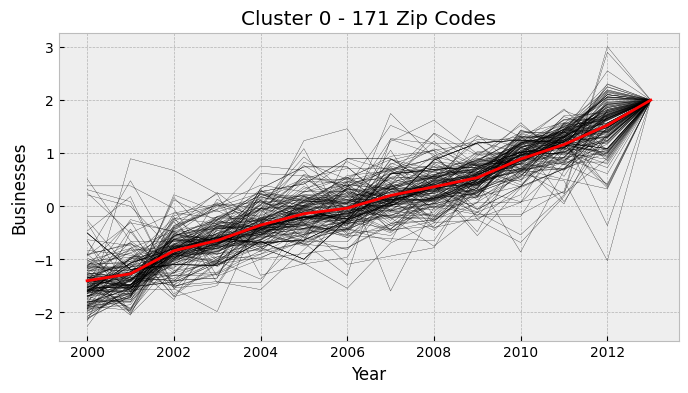

zip  [10002 10003 10004 10004 10004 10004 10009 10011 10012 10014 10018 10025
 10026 10027 10029 10030 10031 10032 10033 10034 10035 10035 10037 10039
 10040 10044 10045 10069 10104 10112 10119 10120 10154 10155 10167 10168
 10171 10174 10177 10280 10286 10301 10302 10303 10304 10305 10306 10307
 10308 10309 10310 10312 10451 10452 10453 10454 10455 10456 10457 10458
 10459 10460 10462 10463 10463 10465 10467 10468 10469 10471 10472 10474
 10475 11001 11040 11096 11096 11101 11102 11103 11104 11105 11106 11109
 11201 11203 11204 11205 11206 11207 11208 11209 11210 11211 11212 11213
 11214 11215 11216 11217 11218 11219 11220 11221 11222 11223 11224 11225
 11226 11228 11229 11230 11231 11231 11232 11233 11234 11235 11236 11237
 11238 11354 11355 11356 11357 11358 11359 11361 11362 11364 11365 11366
 11367 11368 11369 11370 11370 11372 11373 11375 11377 11378 11379 11385
 11411 11413 11415 11416 11417 11418 11419 11420 11421 11422 11423 11426
 11427 11428 11429 11433 11434 11435 11436 116

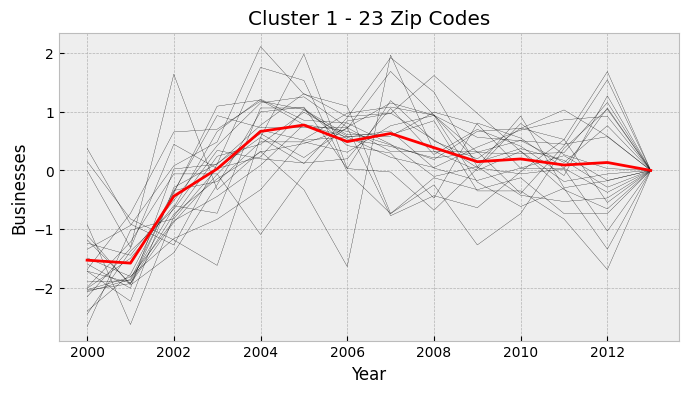

zip  [10001 10023 10024 10028 10041 10055 10105 10128 10282 10314 10461 10466
 10470 10473 11004 11005 11239 11360 11371 11374 11412 11430 11432]


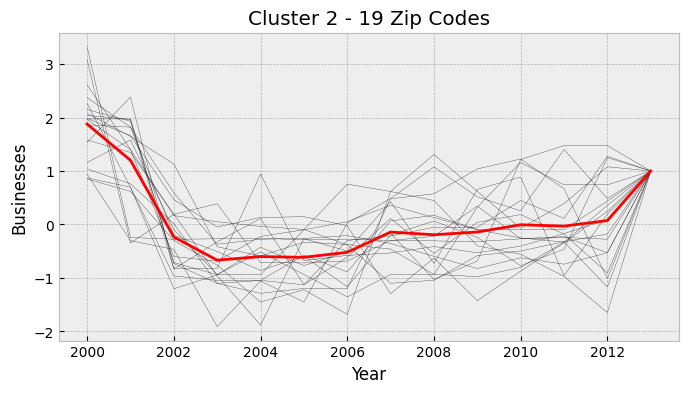

zip  [10005 10006 10010 10013 10022 10106 10107 10115 10151 10153 10170 10172
 10173 10176 10178 10278 10279 10281 10285]


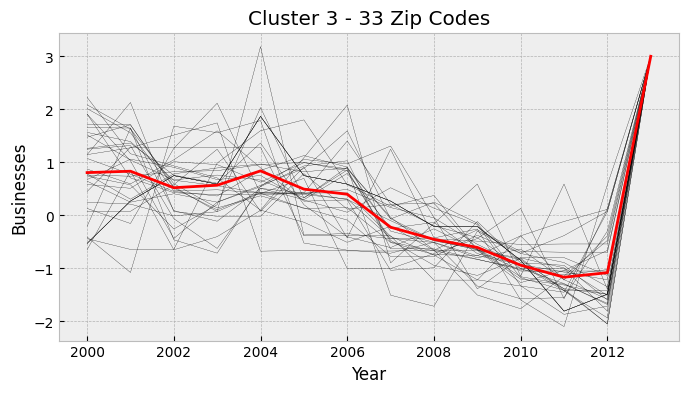

zip  [10007 10016 10017 10019 10020 10021 10036 10038 10043 10080 10081 10103
 10110 10111 10118 10121 10122 10123 10152 10158 10162 10165 10166 10169
 10175 10270 10271 10464 10464 10464 11363 11414 11451]


In [ ]:
# Convert feature names to string
nyc_st1.columns = nyc_st1.columns.astype(str)

# Fit KMeans model to your data
kmeans = KMeans(n_clusters=4, random_state=2)
kmeans.fit(nyc_st1)

# Put cluster centers into a DataFrame
clusters = pd.DataFrame(data=kmeans.cluster_centers_, columns=nyc_st1.columns)

# -- now let's plot all cluster centers, their members, and print their member names

for cnum in range(kmeans.n_clusters):

  # -- True/False index of where labels_ is cnum
  ind = kmeans.labels_ == cnum

  # -- get the members of that cluster number
  mems = nyc_st1[ind]

  # -- make a plot
  ax = mems.T.plot(lw=0.2, color="k", legend=False, figsize=(8, 4))
  clusters.iloc[cnum].plot(color="r", ax=ax)

  # Set axis labels
  ax.set_xlabel("Year")
  ax.set_ylabel("Businesses")

  # Set title with the number of zip codes in the cluster
  ax.set_title(f'Cluster {cnum} - {len(mems)} Zip Codes')

  # -- refresh screen
  plt.pause(0.01)

  # -- print zip codes
  print("zip ", mems.index.values)
  #print("\n\n")


In [ ]:
fname1= "/content/drive/Shareddrives/mlpp24/data/zipcode_shapes/nyc/ZIP_CODE_040114.shp"

<b> Given the shape of the cluster centers, and comparing this with a map of NYC zipcodes to orient yourself spatially, how do you interpret this choropleth?  What does this plot tell you about spatio-temporal trends in the number of businesses in NYC?  What are two possible reasons for the spatial patterns visible in this plot?</b>

In [ ]:
#load geodata set
shape= gpd.read_file (fname1)
shape. head ()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.252 188138.380, 1038141.936 ..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.713 186926.440, 1002314.243 ..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.276 183696.338, 1011373.584 ..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.365 183617.613, 996522.848 18..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.113 176307.496, 992042.798 17..."


In [ ]:
#find datatype
shape.dtypes

ZIPCODE         object
BLDGZIP         object
PO_NAME         object
POPULATION     float64
AREA           float64
STATE           object
COUNTY          object
ST_FIPS         object
CTY_FIPS        object
URL             object
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

In [ ]:
type(shape["ZIPCODE"][0])

str

In [ ]:
nyc_st1.index= nyc_st1.index.astype (str)

In [ ]:
#merge dataset
nyc_merge = shape.merge(nyc_st1, left_on=["ZIPCODE"], right_on = nyc_st1.index)

nyc_merge


,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,Cluster
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,...,0.072581,-0.084678,-0.241937,0.072581,0.544359,0.701619,1.173397,1.409286,0.937508,2
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,...,-0.225754,-0.421407,-0.295630,-0.421407,0.081701,0.486983,1.241646,1.227670,1.954382,2
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,...,-0.347979,-0.332850,-0.590052,-0.332850,-0.105907,0.574922,1.361658,1.573472,1.694508,2
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,...,-0.337931,-0.354262,-0.223612,0.021356,0.119344,0.494962,1.099218,1.376849,1.801462,2
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,...,-0.440298,-0.165967,-0.173382,0.167678,0.315965,0.760826,0.886869,1.250172,1.858148,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,10036,0,New York,23543.0,1.139511e+07,NY,New York,36,061,http://www.usps.com/,...,0.627292,0.993900,0.877658,-0.034391,-0.651365,-1.500823,-1.760131,-1.143157,-0.472532,3
282,11414,0,Howard Beach,26148.0,6.392882e+07,NY,Queens,36,081,http://www.usps.com/,...,0.550113,1.054922,0.970787,1.307327,-0.038831,-1.384990,-0.796046,-0.796046,-1.132585,3
283,10310,0,Staten Island,25003.0,5.346328e+07,NY,Richmond,36,085,http://www.usps.com/,...,-0.639241,-0.138630,0.061614,0.662346,0.361980,0.261858,1.313139,0.562224,1.813749,2
284,10162,1,New York,0.0,2.103489e+04,NY,New York,36,061,http://www.usps.com/,...,0.414450,0.698020,-1.003404,-1.003404,-0.719833,-0.436263,0.130879,-1.570546,0.130879,3


<ipython-input-53-656e21e92a6f>:6: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.

<ipython-input-53-656e21e92a6f>:20: UserWarning:

Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler



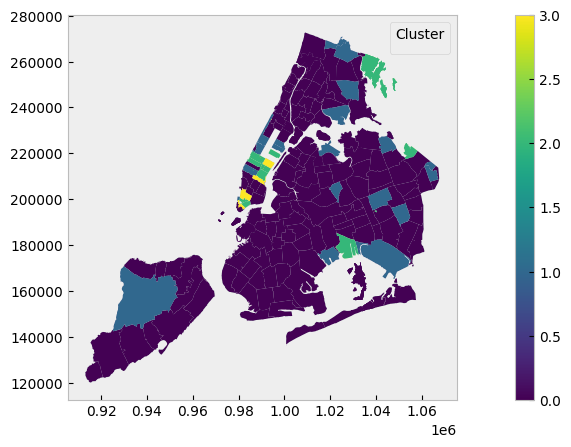

In [ ]:
ax = nyc_merge.plot("Cluster", edgecolor="whitesmoke", legend=True, figsize=(15, 5))
ax.grid(False)

# Get unique cluster labels and colors
unique_clusters = nyc_merge['Cluster'].unique()
colors = plt.cm.get_cmap('viridis', len(unique_clusters))

# Plot each cluster separately to assign custom legend labels
for i, cluster_label in enumerate(unique_clusters):
    cluster_data = nyc_merge[nyc_merge['Cluster'] == cluster_label]

    # Check if the geometry is a Point and handle accordingly
    if cluster_data.geometry.geom_type.iloc[0] == 'Point':
        ax.scatter(cluster_data.geometry.x, cluster_data.geometry.y, color=colors(i), label=f'Cluster {cluster_label}')
    else:
        # For non-Point geometries
        cluster_data.plot(ax=ax, color=colors(i), label=f'Cluster {cluster_label}')

# Add legend
plt.legend(title="Cluster")

# Show the plot
plt.show()

**(GGD: -1 [close, but again note that what you are visualizing here are *trends* not total numbers; e.g., the zipcodes in cluster 1 have similar trends in terms of increasing/decreasing/etc number of business, not similar absolute number of businesses])**

We have generated a choropleth of New York with four cluster labels for analysis and interpretation. Each cluster is differentiated using a distinct colour. The majority of New York falls in the Cluster 0 category, while the least fall in Cluster 2 category. Cluster 1 and Cluster 3 occupy the middle ranks. We can interpret that the number of businesses is high in small pockets of the eastern and North Western parts of New York. The central parts have relatively lower number of businesses. The Southern tip also has low number of businesses except for a small pocket.  

1.  The Downtown area  could be the reason for having majority of small businesses.
2.   Cluster 1 appears to be Manhattan. Manhattan's high rents explains having low number of small businesses


### **PART 3 - Clustering the full US sample**

<b> Load the pre-cleaned full US zipcode business patterns data (also in the `mlpp24/data/zbp/` folder) into a pandas DataFrame. </b>

In [ ]:
#load data
fname= "/content/drive/Shareddrives/mlpp24/data/zbp/all_zbp_est_total_2000_2012_clean.csv"


In [ ]:
#create dataframe
US_all= pd.read_csv(fname)
US_all. head ()


,zip,N_est_2000,N_est_2001,N_est_2002,N_est_2003,N_est_2004,N_est_2005,N_est_2006,N_est_2007,N_est_2008,N_est_2009,N_est_2010,N_est_2011,N_est_2012,longitude,latitude
0,1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555
1,1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901
2,1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919
3,1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184
4,1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683


In [ ]:
US_all.columns

Index(['zip', 'N_est_2000', 'N_est_2001', 'N_est_2002', 'N_est_2003',
       'N_est_2004', 'N_est_2005', 'N_est_2006', 'N_est_2007', 'N_est_2008',
       'N_est_2009', 'N_est_2010', 'N_est_2011', 'N_est_2012', 'longitude',
       'latitude'],
      dtype='object')

In [ ]:
US_all.columns=['zip', '2000', '2001', '2002','2003', '2004', '2005', '2006', '2007','2008', '2009', '2010', '2011', '2012','longitude',
       'latitude']
US_all.head ()



,zip,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,longitude,latitude
0,1001,493,490,490,505,500,509,509,503,477,458,448,436,453,-72.625880,42.062555
1,1002,563,587,566,586,584,589,582,596,584,571,570,558,572,-72.462112,42.374901
2,1003,13,13,15,16,15,12,12,16,17,16,16,16,15,-72.524793,42.391919
3,1005,86,90,94,93,97,94,98,106,97,87,96,91,94,-72.106157,42.420184
4,1007,219,228,212,230,232,225,238,243,246,230,238,217,217,-72.400286,42.278683




```
# This is formatted as code
```

****<b> Remove all zipcodes (rows) that have standard deviation equal to 0 across the number of establishments columns. </b>


In [ ]:
# Calculate standard deviation across the number of establishments columns
std_devs = US_all.loc[:, '2000':'2012'].std(axis=1)

# Filter out rows where the standard deviation is equal to 0
US_filtered = US_all[std_devs != 0]

US_filtered.shape

(31558, 16)

<b> Now standardize the timeseries across features (time steps). </b>

In [ ]:
# Extract the relevant columns for standardization
columns_to_standardize = US_filtered.columns[US_filtered.columns.str.startswith('20')]

# Exclude 'zip', 'longitude', and 'latitude' columns
columns_to_exclude = ['zip', 'longitude', 'latitude']

# Get the final columns to standardize
columns_to_standardize = [col for col in columns_to_standardize if col not in columns_to_exclude]

# Create a StandardScaler instance
scaler = StandardScaler()

# Standardize across rows (axis=1) excluding specified columns
US_filtered[columns_to_standardize] = scaler.fit_transform(US_filtered[columns_to_standardize].T).T


US_filtered.head()

<ipython-input-59-723ee9dd1072>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,zip,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,longitude,latitude
0,1001,0.435806,0.312644,0.312644,0.928457,0.723186,1.092674,1.092674,0.846349,-0.221061,-1.001091,-1.411634,-1.904284,-1.206363,-72.625880,42.062555
1,1002,-1.313260,0.854661,-1.042270,0.764331,0.583671,1.035322,0.403011,1.667632,0.583671,-0.590620,-0.680950,-1.764911,-0.500290,-72.462112,42.374901
2,1003,-1.089082,-1.089082,0.142054,0.757622,0.142054,-1.704649,-1.704649,0.757622,1.373190,0.757622,0.757622,0.757622,0.142054,-72.524793,42.391919
3,1005,-1.625613,-0.820547,-0.015482,-0.216748,0.588317,-0.015482,0.789583,2.399714,0.588317,-1.424347,0.387051,-0.619281,-0.015482,-72.106157,42.420184
4,1007,-0.965605,-0.082982,-1.652089,0.113157,0.309295,-0.377189,0.897711,1.388057,1.682264,0.113157,0.897711,-1.161743,-1.161743,-72.400286,42.278683


<b> Cluster the standardized US timeseries into 2 clusters with `random_state` equal to 2. </b>

In [ ]:
# Exclude 'zip', 'longitude', and 'latitude' columns
columns_to_exclude = ['zip', 'longitude', 'latitude']

# Get the columns for clustering
columns_for_clustering = [col for col in US_filtered.columns if col not in columns_to_exclude]

# Create a DataFrame with only the columns for clustering
df_for_clustering = US_filtered[columns_for_clustering]

# Create a KMeans instance with 2 clusters and random_state=2
kmeans = KMeans(n_clusters=2, random_state=2)

# Fit the model and get the cluster labels
US_filtered['cluster'] = kmeans.fit_predict(df_for_clustering)

US_filtered

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

<ipython-input-69-ebd59e4a4b63>:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,zip,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,longitude,latitude,cluster
0,1001,0.435806,0.312644,0.312644,0.928457,0.723186,1.092674,1.092674,0.846349,-0.221061,-1.001091,-1.411634,-1.904284,-1.206363,-72.625880,42.062555,0
1,1002,-1.313260,0.854661,-1.042270,0.764331,0.583671,1.035322,0.403011,1.667632,0.583671,-0.590620,-0.680950,-1.764911,-0.500290,-72.462112,42.374901,0
2,1003,-1.089082,-1.089082,0.142054,0.757622,0.142054,-1.704649,-1.704649,0.757622,1.373190,0.757622,0.757622,0.757622,0.142054,-72.524793,42.391919,1
3,1005,-1.625613,-0.820547,-0.015482,-0.216748,0.588317,-0.015482,0.789583,2.399714,0.588317,-1.424347,0.387051,-0.619281,-0.015482,-72.106157,42.420184,1
4,1007,-0.965605,-0.082982,-1.652089,0.113157,0.309295,-0.377189,0.897711,1.388057,1.682264,0.113157,0.897711,-1.161743,-1.161743,-72.400286,42.278683,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31599,99923,0.426401,0.426401,1.350271,1.350271,0.426401,1.350271,0.426401,-1.421338,-1.421338,-0.497468,-0.497468,-0.497468,-1.421338,-130.040519,55.981117,0
31600,99925,1.765561,0.847469,-0.529668,-0.070622,-0.988714,-1.447760,0.388424,0.388424,-0.070622,1.306515,-1.447760,-0.988714,0.847469,-132.976265,55.557671,0
31601,99926,1.080123,1.080123,0.077152,1.080123,1.080123,0.077152,1.080123,-0.925820,-0.925820,-1.928792,0.077152,-0.925820,-0.925820,-131.490108,55.127000,0
31602,99927,-0.615457,0.984732,0.984732,-0.615457,-0.615457,0.984732,-2.215647,0.984732,-0.615457,-0.615457,-0.615457,0.984732,0.984732,-133.378427,56.250473,0




```
# This is formatted as code
```

<b> Plot the two clusters on the same line plot in `"dodgerblue"` (cluster 0) and `"crimson"` (cluster 1).  Make sure to use proper values for the x-axis, axis labels for the axes, and include a legend. (GGD: OK, but note that the values on the y-axis are now standardized)</b>


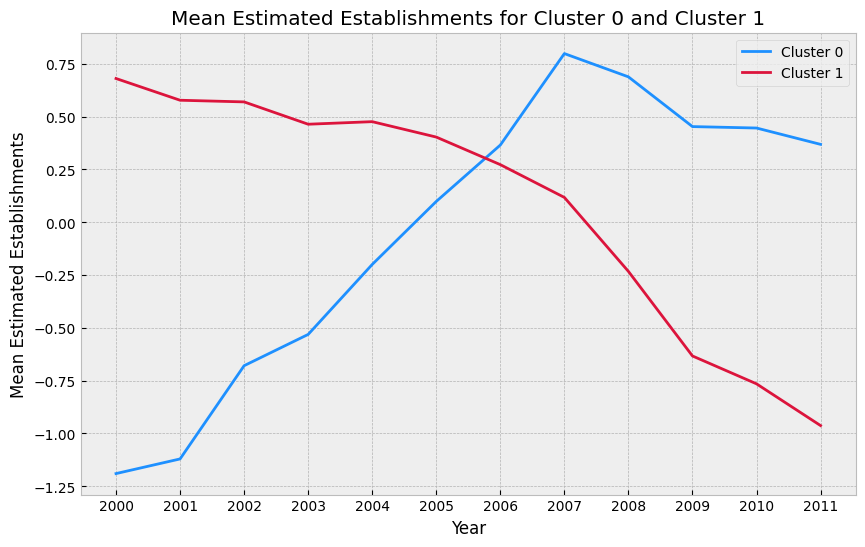

In [ ]:
# Extract relevant columns for the plot
years = US_filtered.columns[1:13]  # Assuming the columns for 20_XXXX represent the years
cluster_0_values = US_filtered[US_filtered['cluster'] == 0][years].mean()
cluster_1_values = US_filtered[US_filtered['cluster'] == 1][years].mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, cluster_0_values, label='Cluster 0', color='dodgerblue')
plt.plot(years, cluster_1_values, label='Cluster 1', color='crimson')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Mean Estimated Establishments')
plt.title('Mean Estimated Establishments for Cluster 0 and Cluster 1')
plt.legend()

# Show the plot
plt.show()

<b> Extract the latitude and longitude of the US zipcodes from the original US dataframe and make a scatter plot of the longitude (x) and latitude (y) values with the following characteristics:

  1. set the figsize to be square (e.g., 15x15)
  2. set the facecolor of the plot to be lightgray
  3. set the markers to be a reasonable size to see the spatial patterns
  4. set the zipcodes that are labeled as being in cluster 0 to be `"dodgerblue"` in color
  5. set the zipcodes that are labeled as being in cluster 1 to be `"crimson"` in color
  6. set the alpha/opacity values of the points to be 0.5
  7. set the axis xlims to be -130 to -65
  8. set the axis ylims to be 20 to 60

(GGD: OK, but xlims should go to -65 to show the full map)
  
 </b>

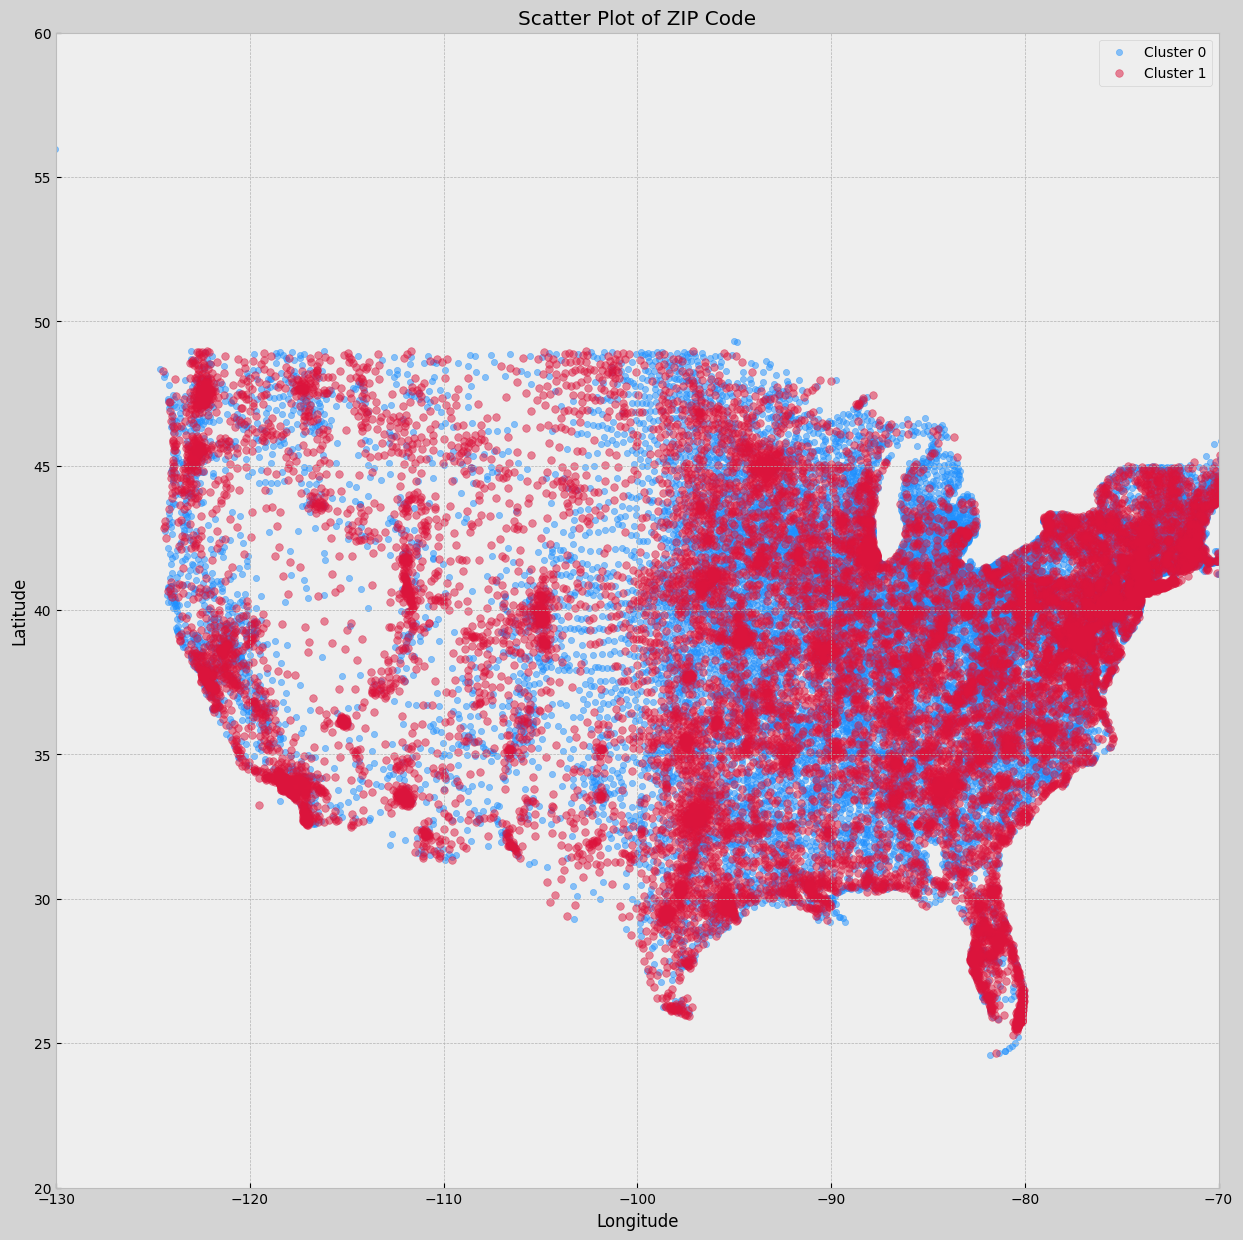

In [ ]:
# Set the figsize and facecolor
plt.figure(figsize=(15, 15), facecolor='lightgray')


# Scatter plot for cluster 0
plt.scatter(US_filtered[US_filtered['cluster'] == 0]['longitude'],
            US_filtered[US_filtered['cluster'] == 0]['latitude'],
            c='dodgerblue', s=20, alpha=0.5, label='Cluster 0')

# Scatter plot for cluster 1
plt.scatter(US_filtered[US_filtered['cluster'] == 1]['longitude'],
            US_filtered[US_filtered['cluster'] == 1]['latitude'],
            c='crimson', s=30, alpha=0.5, label='Cluster 1')


# Set plot properties
plt.title('Scatter Plot of ZIP Code')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xlim(-130, -70)
plt.ylim(20, 60)
plt.legend()

# Show the plot
plt.show()

<b> What can you say about where the number of businesses saw a period of increase prior to 2008 vs where the number of businesses have been steadily declining since 2000? (GGD: OK, but if you had mad the points on the plot above a bit smaller you might have seen spatial patterns in the urban centers) </b>

This scatter plot represents the spatial distribution of businesses in the United States, color-coded based on the clustering results. The businesses have steadily declined in the East Coast and Central US since 2000. These are majorly part of Cluster 1

---

### **EXTRA CREDIT: choosing *k* for NYC**

<b> Use the "elbow method" to determine an appropriate value for *k* for NYC.